In [1]:
from scipy.integrate import odeint, solve_ivp

import numpy as np

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")


<h4>System Parameters

In [29]:
m = 1
c = 0.1
k = 1
x0 = 0.1
v0 = 0.1

zeta = c / (2 * np.sqrt(k * m))
omegan = np.sqrt(k / m)
omega1 = omegan * np.sqrt(1 - zeta ** 2)
A0 = np.sqrt(x0 ** 2 + (v0/omega1 + zeta * x0 * omegan / omega1)**2)
phi0 = np.arctan((v0 + zeta * omegan * x0) / (x0 * omega1 + 1e-10))

F0 = 1
Omega = 2

times = np.arange(0, 100.01, 0.1)

<h2> Free Vibration

<h4>Exact solution

In [30]:
z_exact = A0 * np.exp(- zeta * omegan * times) * np.cos(omega1 * times - phi0)

<h5> Odeint

In [32]:
def sdof_model_odeint(x, t):
    return [x[1], - 2 * zeta * omegan * x[1] - omegan ** 2 * x[0]]

<h5> Solve ivp

In [34]:
def sdof_solve_ivp(t, y):
    return [y[1], - 2 * zeta * omegan * y[1] - omegan ** 2 * y[0]]

In [35]:
z_odeint = odeint(sdof_model_odeint, [x0, v0], times)
z_solve_ivp = solve_ivp(fun=sdof_solve_ivp, t_span=[times[0], times[-1]], y0=[x0, v0], t_eval=times)

<h4> Plot

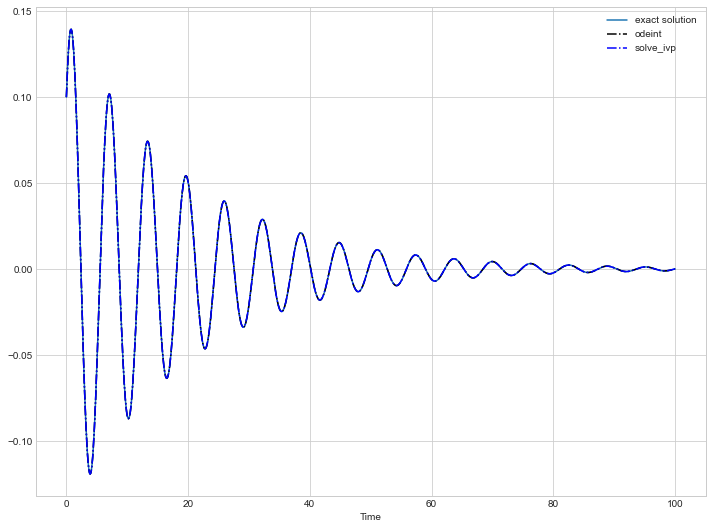

In [36]:
plt.figure(figsize=(12, 9))

plt.plot(times, z_exact, label='exact solution')
plt.plot(times, z_odeint[:, 0], "k-.", label="odeint")
plt.plot(times, z_solve_ivp.y[0], "b-.", label="solve_ivp")
plt.legend()
plt.xlabel("Time")
plt.show()

<h2> Harmonic Excitation

In [37]:
def sdof_harmonic_excitation(t, x):
    return [x[1], - c / m * x[1] - omegan ** 2 * x[0] + F0 / m * np.cos(Omega * t)]


In [39]:
z_harm_solve_ivp = solve_ivp(fun=sdof_harmonic_excitation, t_span=[times[0], times[-1]], y0=[x0, v0], t_eval=times)

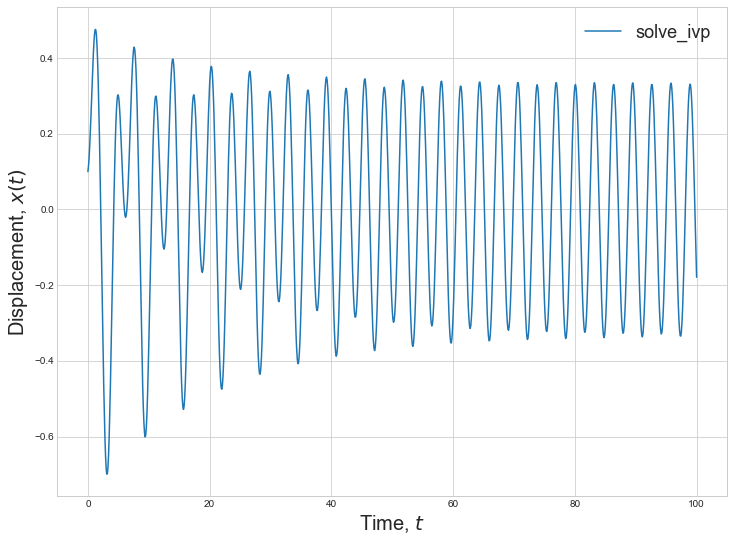

In [47]:
plt.figure(figsize=(12, 9))
plt.plot(times, z_harm_solve_ivp.y[0], label="solve_ivp")
plt.legend(fontsize=18)
plt.ylabel(r"Displacement, $x(t)$", fontsize=20)
plt.xlabel(r"Time, $t$", fontsize=20)
plt.show()